# Computational Methods in Ordinary Differential Equations

*Dr Jon Shiach, Department of Computing and Mathematics, Manchester Metropolitan University*

---
# Implicit Runge-Kutta Methods

#### Learning outcomes

On successful completion of this page readers will be able to:

- [Determine the order](#Dermining-the-order-of-an-implicit-Runge-Kutta-method) of an implicit Runge-Kutta method;
- Derive [Gauss-Legendre](#Gauss-Legendre-methods), [Radau](#Radau-methods), [DIRK](#Diagonally-implicit-Runge-Kutta-methods) and [SDIRK](#Singly-diagonally-implicit-Runge-Kutta-methods) implicit Runge-Kutta methods;
- [Apply implicit Runge-Kutta methods to solve initial value problems](#Implementation-of-implicit-Runge-Kutta-methods).

**Implicit Runge-Kutta** (IRK) methods and **Explicit Runge-Kutta** (ERK) methods are the two main types of the family of Runge-Kutta methods. ERK methods are straightforward to apply to solve an ordinary differential equation but are not suitable for **stiff** systems. This is why we need to also consider IRK methods. 

The general form of an IRK method to solve a first-order ODE of the form $y'=f(t, y)$

\begin{align*}
    y_{n+1} &= y_n + h\sum_{i=1}^s b_i k_i, \\
    k_i &= f(t_n + c_ih, y_n + h\sum_{j=1}^s a_{ij}k_j).
\end{align*}

Here $y_n = y(t_n)$ is the solution at a discrete point in the domain $t_n$, $y_{n+1} = y(t_n + h)$ is the solution at some small step $h$ along the domain, $a_{ij}$, $b_i$ and $c_i$ are coefficients that define a particular method and $k_i$ are intermediate **stage values** used to calculate $y_{n+1}$.

It is common to represent the $a_{ij}$, $b_i$ and $c_i$ coefficients in a **Butcher tableau**

$$\begin{array}{c|cccc}
c_1 & a_{11} & a_{12} & \cdots & a_{1s} \\
c_2 & a_{21} & a_{22} & \cdots & a_{2s} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
c_s & a_{s1} & a_{s2} & \cdots & a_{ss} \\ \hline
& b_1 & b_2 & \cdots & b_s
\end{array}$$

Note that the $A$ matrix of an IRK method has non-zero elements in the upper triangular region and on the main diagonal whereas the $A$ method for an ERK method only has non-zero elements in the lower triangular region.

## Determining the order of an implicit Runge-Kutta method

<a id="order_conditions"></a>
One of the differences between IRK and ERK methods is that an IRK method can achieve the same accuracy as an ERK method but using fewer stages. To determine the order of an IRK method we need to consider the **order conditions** that govern the values of $A$, $\mathbf{b}$ and $\mathbf{c}$ which are

\begin{align*}
    B(k):& & \sum_{i=1}^s b_ic_i^{j-1} &= \frac{1}{j}, & j &= 1, 2, \ldots, k, &&& (1) \\
    C(k):& & \sum_{j=1}^s a_{ij}c_j^{\ell-1} &= \frac{1}{\ell}c_i^{\ell}, & i &= 1, 2, \ldots s, & \ell &= 1, 2, \ldots , k, & (2) \\
    D(k):& & \sum_{i=1}^s b_ic_i^{\ell-1} a_{ij} &= \frac{1}{\ell} b_j (1 - c_j^\ell), & j &= 1, 2, \ldots, s, & \ell &= 1, 2, \ldots, k. & (3)
\end{align*}

Let $G(k)$ represent a given IRK method has order $k$, then it can be shown that

$$B(k) \text{ and } C(\lfloor \tfrac{k}{2} \rfloor) \text{ and } D(\lfloor \tfrac{k}{2} \rfloor) \implies G(k).$$

So to determine the order of an IRK method we need to find the highest value of $k$ for which equation (1) is satisfied and which equations (2) and (3) are satisfied for $\lfloor \frac{k}{2} \rfloor$ (i.e. the integer part of $\frac{k}{2}$).

#### Example 1

Determine the order of the following IRK method

$$\begin{array}{c|cc}
\frac{1}{4} & \frac{1}{4} & 0 \\
\frac{3}{4} & \frac{1}{2} & \frac{1}{4} \\ \hline
& \frac{1}{2} & \frac{1}{2}
\end{array} $$

Checking the $B(k)$ order condition:

\begin{align*}
    j &= 1, & \mathrm{LHS} &= b_1c_1^0 + b_2c_2^0 = \frac{1}{2}\cdot 1 + \frac{1}{2}\cdot 1  = 1, & \mathrm{RHS} & = 1, \\
    j &= 2, & \mathrm{LHS} &= b_1c_1^1 + b_2c_2^1 = \frac{1}{2} \cdot \frac{1}{4} + \frac{1}{2} \cdot \frac{3}{4} = \frac{1}{2}, & \mathrm{RHS} &= \frac{1}{2}, \\
    j &= 3, & \mathrm{LHS} &= b_1c_1^2 + b_2c_2^2 = \frac{1}{2} \cdot \frac{1}{16} + \frac{1}{2} \cdot \frac{9}{16} = \frac{5}{16}, & \mathrm{RHS} &= \frac{1}{3}.
\end{align*}

So the $B(k)$ order condition is satisfied up to $k=j=2$. Now we need to check whether $C(k)$ order condition is satisfied up to $k = 1$.

\begin{align*}
    \ell &= 1, & i &= 1, & \mathrm{LHS} &= a_{11}c_1^0 + a_{12}c_2^0 = \frac{1}{4} \cdot 1 + 0 \cdot 1 = \frac{1}{4}, & \mathrm{RHS} &= \frac{1}{\ell}c_1^\ell = \frac{1}{4}, \\
    \ell &= 1, & i &= 2, & \mathrm{LHS} &= a_{21}c_1^0 + a_{22}c_2^0 = \frac{1}{2} \cdot 1 + \frac{1}{4} \cdot 1 = \frac{3}{4}, & \mathrm{RHS} &= \frac{1}{\ell}c_2^\ell = \frac{3}{4}
\end{align*}

So the $C(k)$ order condition is satisfied up to $k=1$. Now we need to check whether the $D(k)$ order condition is satisfied up to $k=1$

\begin{align*}
    \ell &= 1, & j &= 1, & \mathrm{LHS} &= b_1c_1^0a_{11} + b_2c_2^0 a_{21} = \frac{1}{2} \cdot 1 \cdot \frac{1}{4} + \frac{1}{2} \cdot 1 \cdot \frac{1}{2} = \frac{3}{8}, \\
    & & & & \mathrm{RHS} &= \frac{1}{\ell}b_1(1 - c_1^\ell) = \frac{1}{2}\left(1 - \frac{1}{4}\right) = \frac{3}{8}, \\
    \ell &= 1, & j &= 2, & \mathrm{LHS} &= b_1c_1^0a_{12} + b_2c_2^0a_{22} = \frac{1}{2}\cdot 1 \cdot 0 + \frac{1}{2} \cdot 1 \cdot \frac{1}{4} = \frac{1}{8}, \\
    & & & & \mathrm{RHS} &= \frac{1}{\ell}b_2(1 - c_2^\ell) = \frac{1}{2}\left( 1 - \frac{3}{4} \right) = \frac{1}{8}.
\end{align*}

So the $D(k)$ order condition is satisfied up to $k=1$. Therefore since $B(2)$, $C(1)$ and $D(1)$ are all satisfied this IRK method is order 2.

---
## Deriving implicit Runge-Kutta methods

### Gauss-Legendre methods

[**Gauss-Legendre**](https://en.wikipedia.org/wiki/Gauss%E2%80%93Legendre_method) IRK methods are a family of methods that are derived using Gauss-Legendre quadrature. An $s$-stage Gauss-Legendre method has order $k=2s$. They are derived using [Legendre polynomials](https://en.wikipedia.org/wiki/Legendre_polynomials) which can take the form

\begin{align*}
P_n(t) = \sum_{k=0}^n {n \choose k}{n+k \choose k}(t - 1)^k. & & (4)
\end{align*}

where ${n \choose k}$ is the [Binomial coefficient](https://en.wikipedia.org/wiki/Binomial_coefficient). The values of the $c_i$ coefficients are the roots of $P_{s}(t)$, the values of the $b_i$ coefficents are chosen to satisfy the $B(k)$ condition and the $a_{ij}$ coefficients are chosen to satisfy the $C(\lfloor \frac{k}{2} \rfloor)$ condition.

#### Example 2

Derive a fourth-order Gauss-Legendre method.

A fourth-order Gauss-Legendre method will have $s=2$ stages and the $c_i$ coefficients are chosen to satisfy $0 = P_{2}(t)$

\begin{align*}
    0 &= {2 \choose 0}{2 \choose 0}(t - 1)^0 + {2 \choose 1}{3 \choose 1}(t - 1)^1 + {2 \choose 2}{4 \choose 2}(t - 1)^2 \\
    &= 1 + 6t - 6 + 6t^2 - 12t + 6 \\
    &= 6t^2 - 6t + 1,
\end{align*}

therefore $c_1 = \frac{1}{2} - \frac{\sqrt{3}}{6}$ and $c_2 = \frac{1}{2} + \frac{\sqrt{3}}{6}$. The $b_i$ and $a_{ij}$ coefficients are chosen to satisfy the $B(4)$ and $C(2)$ order conditions respectively

\begin{align*}
    b_1 + b_2 &= 1, \\
    b_1c_1 + b_2c_2 &= \frac{1}{2}, \\
    a_{11} + a_{12} &= c_1, \\
    a_{21} + a_{22} &= c_2, \\
    a_{11}c_1 + a_{12}c_2 &= \frac{1}{2}c_1^2, \\
    a_{21}c_1 + a_{22}c_2 &= \frac{1}{2}c_2^2.
\end{align*}

The code below uses the [`solve`](https://docs.sympy.org/latest/modules/solvers/solvers.html) command from the `sympy` library to solve these order conditions for the coefficients $a_{ij}$ and $b_i$.

In [1]:
from sympy import *

# Define symbolic variables
a11, a12, a21, a22, b1, b2, c1, c2, = symbols('a11, a12, a21, a22, b1, b2, c1, c2')
c1 = Rational('1 / 2') - sqrt(3) / 6
c2 = Rational('1 / 2') + sqrt(3) / 6

# Order conditions
eqn1 = b1 + b2 - 1
eqn2 = b1 * c1 + b2 * c2 - Rational('1 / 2')
eqn3 = a11 + a12 - c1
eqn4 = a21 + a22 - c2
eqn5 = a11 * c1 + a12 * c2 - Rational('1 / 2') * c1**2
eqn6 = a21 * c1 + a22 * c2 - Rational('1 / 2') * c2**2

# Solve for the a coefficients
solve((eqn1, eqn2, eqn3, eqn4, eqn5, eqn6))

{a11: 1/4,
 a12: -sqrt(3)/6 + 1/4,
 a21: 1/4 + sqrt(3)/6,
 a22: 1/4,
 b1: 1/2,
 b2: 1/2}

So $b_1 = \frac{1}{2}$, $b_2 = \frac{1}{2}$, $a_{11} = \frac{1}{4}$, $a_{12} = \frac{1}{4} - \frac{\sqrt{3}}{6}$, $a_{21} = \frac{1}{4} + \frac{\sqrt{3}}{6}$ and $a_{22} = \frac{1}{4}$. So the fourth-order Gauss-Legendre method is

$$\begin{array}{c|cc}
\frac{1}{2} - \frac{\sqrt{3}}{6} & \frac{1}{4} & \frac{1}{4} - \frac{\sqrt{3}}{6} \\
\frac{1}{2} + \frac{\sqrt{3}}{6} & \frac{1}{4} + \frac{\sqrt{3}}{6} & \frac{1}{4} \\ \hline
& \frac{1}{2} & \frac{1}{2}
\end{array}$$

### Radau methods

Gauss-Legendre methods give us maximal order for the number of stages, however sometimes it is better the sacrifice order to gain better stability properties (see [Stability of Runge-Kutta Methods](stability.ipynb)). An $s$-stage [**Radau**](https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Radau_methods) IRK method has order $k=2s-1$ and is A-stable. The are two types of Radau methods: Radau IA and Radau IIA.

#### Radau IA: 
Let $c_1=0$ and the other $c_i$ coefficients are the roots of 

$$0 = P_s(t) + P_{s-1}(t)$$

The coefficients $b_i$ are chosen to satisfy the $B(2s)$ order condition and the coefficients $a_{ij}$ are chosen to satisfy the $C(s)$ order condition.

#### Radau IIA
Let $c_2 = 0$ and the other $c_i$ coefficients are the roots of 

$$0=P_s(t) - P_{s-1}(t)$$

The coefficients $b_i$ are chosen to satisfy the $B(2s)$ order condition and the coefficients $a_{ij}$ are chosen to satisfy the $D(s)$ order condition.

#### Example 3

Derive a third-order Radau IA method.

An $k=3$ order Radau IA method will have $s=2$ stages. Let $c_1=0$ then the value of $c_2$ is the root of $0 = P_2(t) + P_1(t)$

\begin{align*}
    0 = (6t^2 - 6t + 1) + (2t - 1) = 6t^2 - 4t,
\end{align*}

which is $c_2 = \frac{2}{3}$. The values of $b_i$ and $a_{ij}$ need to satisfy the $B(4)$ and $C(2)$ order conditions respectively with $k=2$ (same as in [example 2](#Example-2)).

In [2]:
# Define symbolic variables
a11, a12, a21, a22, b1, b2, c1, c2, = symbols('a11, a12, a21, a22, b1, b2, c1, c2')
c1 = 0
c2 = Rational('2 / 3')

# Define order conditions
eqn1 = b1 + b2 - 1
eqn2 = b1 * c1 + b2 * c2 - Rational('1 / 2')
eqn3 = a11 + a12 - c1
eqn4 = a21 + a22 - c2
eqn5 = a11 * c1 + a12 * c2 - Rational('1 / 2') * c1**2
eqn6 = a21 * c1 + a22 * c2 - Rational('1 / 2') * c2**2

# Solve system
solve((eqn1, eqn2, eqn3, eqn4, eqn5, eqn6))

{a11: 0, a12: 0, a21: 1/3, a22: 1/3, b1: 1/4, b2: 3/4}

So $a_{11} = 0$, $a_{12} = 0$, $a_{21} = \frac{1}{3}$,  $a_{22} = \frac{1}{3}$, $b_1 = \frac{1}{4}$ and $b_2 = \frac{3}{4}$ and the third-order Radau IA method is 

$$\begin{array}{c|cc}
0 & 0 & 0 \\ 
\frac{2}{3} & \frac{1}{3} & \frac{1}{3} \\ \hline
& \frac{1}{4} & \frac{3}{4}
\end{array}$$

### Diagonally implicit Runge-Kutta methods

[**Diagonally Implicit Runge-Kutta**](https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Diagonally_Implicit_Runge_Kutta_methods) (DIRK) methods are where the $A$ matrix is lower triangular with non-zero elements on the main diagonal, i.e.,

$$\begin{array}{c|cccc}
c_1 & a_{11} \\
c_2 & a_{21} & a_{22} \\
\vdots & \vdots & \vdots & \ddots \\
c_s & a_{s1} & a_{s2} & \cdots & a_{ss} \\ \hline
& b_1 & b_2 & \cdots & b_s
\end{array}$$

The advantage of DIRK methods is that although the stage values $k_1, k_2, \ldots, k_s$ are defined using implicit equations, the solutions to these can be obtained sequentially since the equation for $k_i$ does not include $k_{i+1}, k_{i+2}, \ldots, k_s$.

The coefficients of a $k$th-order DIRK method are chosen to satisfy the $B(k)$ and $C(\lfloor \frac{k}{2} \rfloor)$ order conditions along with

$$ \mathbf{b}^T \cdot A \cdot \mathbf{c} = \frac{1}{k!}$$

#### Example 4

Derive a 2-stage third-order DIRK method.

Since $k=3$ the order conditions are (remembering that $a_{12}=0$)

\begin{align*}
    b_1 + b_2 &= 1, \\
    b_1c_1 + b_2c_2 &= \frac{1}{2}, \\
    b_1c_1^2 + b_2c_2^2 &= \frac{1}{3}, \\
    a_{11} &= c_1, \\
    a_{21} + a_{22} &= c_2, \\
    b_1a_{11}c_1 + b_2(a_{21}c_1 + a_{22}c_2) &= \frac{1}{6}
\end{align*}

Here we have a system of 6 equations in 7 unknowns. Choosing $c_1=\frac{1}{4}$ and solving for the other coefficients.

In [3]:
# Define symbolic variables
a11, a21, a22, b1, b2, c1, c2 = symbols('a11, a21, a22, b1, b2, c1, c2')
c1 = Rational('1 / 4')

# Define order conditions
eqn1 = b1 + b2 - 1
eqn2 = b1 * c1 + b2 * c2 - Rational('1 / 2')
eqn3 = b1 * c1**2 + b2 * c2**2 - Rational('1 / 3')
eqn4 = a11 - c1
eqn5 = a21 + a22 - c2
eqn6 = b1 * a11 * c1 + b2 * (a21 * c1 + a22 * c2) - Rational('1 / 6')

# Solve for the coefficients
solve((eqn1, eqn2, eqn3, eqn4, eqn5, eqn6))

[{a11: 1/4, a21: 2/3, a22: 1/6, b1: 4/7, b2: 3/7, c2: 5/6}]

So $a_{11} = \frac{1}{4}$, $a_{21} = \frac{2}{3}$, $a_{22} = \frac{1}{6}$, $b_1 = \frac{4}{7}$, $b_2 = \frac{3}{7}$ and $c_2 = \frac{5}{6}$  so a third-order DIRK method is

$$\begin{array}{c|cc}
\frac{1}{4} & \frac{1}{4} \\
\frac{5}{6} & \frac{2}{3} & \frac{1}{6}  \\ \hline
& \frac{4}{7} & \frac{3}{7}
\end{array}$$

### Singly diagonally implicit Runge-Kutta methods

**Singly Diagonally Implicit Runge-Kutta** (SDIRK) methods are a variation on DIRK method with the additional condition that the elements on the main diagonal have the same value (i.e., $c_1 = a_{ii}$ by the row sum condition on the first row of $A$)

$$\begin{array}{c|cccc}
c_1 & c_1 \\
c_2 & a_{21} & c_1 \\
\vdots & \vdots & \vdots & \ddots \\
c_s & a_{s1} & a_{s2} & \cdots & c_1 \\ \hline
& b_1 & b_2 & \cdots & b_s
\end{array}$$

The advantage that SDIRK methods is that they are A-stable (see [Stability of Runge-Kutta Methods](stability.ipynb)) whereas DIRK methods are not.

The derivation of an $k$th-order SDIRK method uses the same order conditions for the standard DIRK method with the addition of the $D(\lfloor \frac{k}{2} \rfloor)$ condition.

#### Example 5

Derive 2-stage third-order SDIRK method.

Since $a_{11} = a_{22} = c_1$ the order conditions used in [example 4](#Example-4) become

\begin{align*}
    b_1 + b_2 &= 1, \\
    b_1c_1 + b_2c_2 &= \frac{1}{2}, \\
    b_1c_1^2 + b_2c_2^2 &= \frac{1}{3}, \\
    a_{21} + c_1 &= c_2, \\
    b_1c_1^2 + b_2(a_{21}c_1 + c_1c_2) &= \frac{1}{6}
\end{align*}

Here we have 5 equations in 5 unknowns. Solving these order conditions:

In [4]:
# Define symbolic variables
a21, b1, b2, c1, c2 = symbols('a21, b1, b2, c1, c2')

# Define order conditions
eqn1 = b1 + b2 - 1
eqn2 = b1 * c1 + b2 * c2 - Rational('1 / 2')
eqn3 = b1 * c1**2 + b2 * c2**2 - Rational('1 / 3')
eqn4 = a21 + c1 - c2
eqn5 = b1 * c1 * c1 + b2 * (a21 * c1 + c1 * c2) - Rational('1 / 6')

# Solve for the coefficients
solve((eqn1, eqn2, eqn3, eqn4, eqn5))

[{a21: -sqrt(3)/3,
  b1: 1/2,
  b2: 1/2,
  c1: sqrt(3)/6 + 1/2,
  c2: -sqrt(3)/6 + 1/2},
 {a21: sqrt(3)/3, b1: 1/2, b2: 1/2, c1: -sqrt(3)/6 + 1/2, c2: sqrt(3)/6 + 1/2}]

So $a_{21} = \mp \frac{\sqrt{3}}{3}$, $b_1 = \frac{1}{2}$, $b_2 = \frac{1}{2}$, $c_1 = \frac{1}{2} \pm \frac{\sqrt{3}}{6}$ $c_2 = \mp \frac{\sqrt{3}}{6}$ and the third-order SDIRK method is 

$$\begin{array}{c|cc}
    \frac{1}{2} \pm \frac{\sqrt{3}}{6} & \frac{1}{2} \pm \frac{\sqrt{3}}{6} \\
    \frac{1}{2} \mp \frac{\sqrt{3}}{6} & \mp \frac{\sqrt{3}}{3} & \frac{1}{2} \pm \frac{\sqrt{3}}{6} \\ \hline
    & \frac{1}{2} & \frac{1}{2}
\end{array}$$

---
## Implementation of implicit Runge-Kutta methods

The general form of an IRK method is

\begin{align*}
    y_{n+1} &= y_n + h\sum_{i=1}^s b_i k_i, \\
    k_i &= f(t_n + c_ih, y_n + h\sum_{j=1}^s a_{ij}k_j).
\end{align*}

Let $Y_i = y_n + h\displaystyle\sum_{j=1}^s a_{ij}k_j$ then

\begin{align*}
    y_{n+1} &= y_n + h \sum_{i=1}^s b_i f(t_n + c_ih, Y_i), \\
    Y_i &= y_n + h \sum_{j=1}^s a_{ij} f(t_n + c_jh, Y_j).
\end{align*}

Expanding the summation in the expression for $Y_i$ gives

\begin{align*}
    Y_1 &= y_n + h (a_{11} f(t_n + c_1h, Y_1) + a_{12} f(t_n + c_2h, Y_2) + \cdots + a_{1s} f(t_n + c_sh, Y_s)), \\
    Y_2 &= y_n + h (a_{21} f(t_n + c_1h, Y_1) + a_{22} f(t_n + c_2h, Y_2) + \cdots + a_{2s} f(t_n + c_sh, Y_s)), \\
    & \vdots \\
    Y_s &= y_n + h (a_{s1} f(t_n + c_1h, Y_1) + a_{s2} f(t_n + c_2h, Y_2) + \cdots + a_{ss} f(t_n + c_sh, Y_s)).
\end{align*}

Let $Y = (Y_1, Y_2, \ldots, Y_s)^T$ then we can write

<a id="irk_vector"></a>
\begin{align*}
    Y =  y_n + h A \cdot f(t_n + \mathbf{c}h, Y),
\end{align*}

and

\begin{align*}
    y_{n+1} = y_n + h \mathbf{b} \cdot f( t_n + \mathbf{c}h, Y). && (5)
\end{align*}

Since the equation for the stage values $Y$ is an implict equation we need to use an iterative method to solve this. The simplest iterative method is the <a id="jacobi"></a>[Jacobi method](https://en.wikipedia.org/wiki/Jacobi_method). Let $Y^{k}$ denote an estimate of $Y$ and $Y^{k+1}$ denote an improved estimate. Using non-zero starting values for $Y^0$ the Jacobi method applied to calculate the stage values of an IRK is

\begin{align*}
    Y^{k+1} = y_n + h A \cdot f(t_n + \mathbf{c}h, Y^k). && (6)
\end{align*}

The method is iterated until the largest absolute difference between two successive iterations of the method is less than some small number $tol$, i.e.,

$$\max |Y^{k+1} - Y^{k}| < tol.$$

Note that the Jacobi method is computationally inefficient and in practice [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method) is most commonly used to calculate $Y$. This requires calculation of a [Jacobian matrix](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant) and the solution to a linear system of equations and is outside of the scope of this course.

#### Example 6

Calculate the first step of the following IRK method

$$\begin{array}{c|cc}
0 & \frac{1}{4} & -\frac{1}{4} \\
\frac{2}{3} & \frac{1}{4} & \frac{5}{12} \\ \hline
& \frac{1}{4} & \frac{3}{4}
\end{array}$$

to solve the IVP 

\begin{align*}
    y' &= \sin^2(t)y, & t &\in [0, 5], & y(0) &= 1,
\end{align*}

using a step length of $h=0.5$.

Since $t_0=0$ and $y_0=1$ we need to iterate equation [(6)](#jacobi) so solve for the stage values. Using $Y^0 = (1, 1)^T$:

\begin{align*}
    Y^1 &= y_0 + h A f(t_0 + \mathbf{c}h, Y^0) = 1 + 0.5\pmatrix{\frac{1}{4} & -\frac{1}{4} \\ \frac{1}{4} & \frac{5}{12}} \pmatrix{\sin^2(0)(1) \\ \sin^2(0)(1)} = \pmatrix{0.9866 \\ 1.0223},  \\
    Y^2 &= y_0 + h A f(t_0 + \mathbf{c}h, Y^1) = 1 + 0.5\pmatrix{\frac{1}{4} & -\frac{1}{4} \\ \frac{1}{4} & \frac{5}{12}} \pmatrix{\sin^2(0)(0.9866) \\ \sin^2(0)(1.0223)} = \pmatrix{0.9863 \\ 1.0228}, \\
    Y^3 &= y_0 + h A f(t_0 + \mathbf{c}h, Y^2) = 1 + 0.5\pmatrix{\frac{1}{4} & -\frac{1}{4} \\ \frac{1}{4} & \frac{5}{12}} \pmatrix{\sin^2(0)(0.9863) \\ \sin^2(0)(1.0228)} = \pmatrix{0.9863 \\ 1.0228}, \\
\end{align*}

Here the values of $Y^2$ and $Y^3$ agree to 4 decimal places. Substituting these into equation [(5)](#irk_vector)

\begin{align*}
    y_1 &= y_0 + h \mathbf{b} \cdot f(t_0 + \mathbf{c}h, Y) = 1 + 0.5 \pmatrix{ \frac{1}{2} & \frac{1}{2}} \pmatrix{ \sin^2(0)(0.9863) \\ \sin^2(0)(1.0228)} = 1.0411.
\end{align*}

#### Example 7

Calculate the solution of the IVP from [example 6](#Example-6) over the whole domain $t\in [0,5]$ using the Euler method with a step length of $h=0.5$ and compare it to the exact solution given by

$$y = e^{\frac{1}{2}(t - \sin(t)\cos(t))}$$

The functions below defines the right-hand side of the ODE and the exact solution to the IVP.

In [5]:
def f(t, y):
    return np.sin(t)**2 * y

def exact_sol(t):
    return np.exp(0.5 * (t - np.sin(t) * np.cos(t)))

The function below solves a first-order IVP using IRK method defined by the inputs `A`, `b` and `c`.

In [3]:
def irk(f, tspan, y0, h, A, b, c):
    '''
    Calculates the solution to an initial value problem using an implicit
    Runge-Kutta method defined by A, b and c
    '''
    # Initialise output ararys
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0

    # Loop through steps
    for n in range(nsteps):

        # Solve for Y values using the Jacobi method
        Y = np.ones(b.shape)
        for k in range(100):
            Ynew = y[n] + h * np.matmul(A, f(t[n] + c * h, Y))

            # Check for convergence
            if max(np.abs(Ynew - Y)) < 1e-6:
                break

            # Update Y
            Y = Ynew

        # Calculate the solution at the next step
        y[n + 1] = y[n] + h * np.matmul(b, f(t[n] + c * h, Y))
        t[n + 1] = t[n] + h

    return t, y

The program below solves the IVP given here using this IRK method.

 t    IRK    Exact 
--- ------- -------
0.0  1.0000  1.0000
0.5  1.0411  1.0404
1.0  1.3174  1.3135
1.5  2.0535  2.0436
2.0  3.2955  3.2845
2.5  4.4465  4.4359
3.0  4.8160  4.8059
3.5  4.8943  4.8830
4.0  5.7944  5.7699
4.5  8.6166  8.5589
5.0 14.0405 13.9573


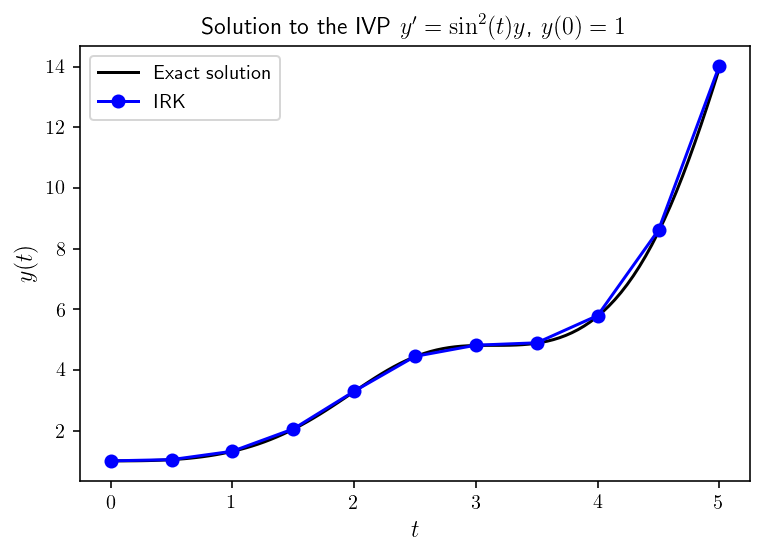

In [6]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib import rc
 %matplotlib inline
rc('text', usetex=True)

# Define IRK method
A = np.array([[1 / 4, -1 / 4], [1 / 4, 5 / 12]])
b = np.array([1 / 4, 3 / 4])
c = np.array([0, 2 / 3])

# Define IVP parameters
tspan = [0, 5]
y0 = 1
h = 0.5

# Solve IVP using the IRK method
t, y = irk(f, tspan, y0, h, A, b, c)

# Output solution table
table = Table([t, y, exact_sol(t)], names=('t', 'IRK', 'Exact'))
table['t'].info.format = '0.1f'
table['IRK'].info.format = '0.4f'
table['Exact'].info.format = '0.4f'
print(table)

# Plot solutions
fig, ax = plt.subplots()

t1 = np.linspace(tspan[0], tspan[1], 100)
ax.plot(t1, exact_sol(t1), 'k-', label='Exact solution')
ax.plot(t, y, 'bo-', label='IRK')

ax.set_title("Solution to the IVP $y'=\sin^2(t)y$, $y(0) = 1$")
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

We can see here that the solution computed using this IRK method (which is of order 3) closely matches the exact exact solution.

---
## Summary

- The stage values in an [Implicit Runge-Kutta (IRK) methods](#Implicit-Runge-Kutta-Methods) are defined using implicit equations.
- The $A$ matrix of an IRK method has non-zero elements on the main diagonal or upper triangular region.
- IRK methods use fewer stages to achieve the same accuracy as Explicit Runge-Kutta (ERK) methods.
- The derivation of IRK methods involves choosing values of $A$, $b$ and $c$ to satisfy some [order conditions](#order_conditions).
- IRK methods have better stability properties than ERK methods meaning they can be used to solve stiff ODEs with which ERK methods are suitable (see [Stability of Runge-Kutta method](stability.ipynb)).
- IRK methods require an interative method such as the [Jacobi method](#jacobi) to calculate the stage values.
- IRK methods are more computationally expensive when applied to non-stiff methods than ERK methods.

Next: [Stability of Runge-Kutta Methods](stability.ipynb)